# Delivrable 3 Captionning

# Sommaire

1. [Introduction](#introduction)
    - [Objectif du projet](#objectif-du-projet)
    - [Problématique](#problématique)

2. [Exploration du Dataset](#exploration-du-dataset)
    - [Chemins du dataset](#chemins-du-dataset)
    - [Exploration de la répartition des résolutions par image](#exploration-de-la-répartition-des-résolutions-par-image)  
    - [Exploration de la répartition des annotations par catégorie d'objets](#exploration-de-la-répartition-des-annotations-par-catégorie-dobjets)
    - [Exploration de la répartition des annotations par image](#exploration-de-la-répartition-des-annotations-par-image)

3. [Préparation des légendes](#préparation-des-légendes)

4. [Architecture de Captioning d'Images](#architecture-de-captioning)
    - [Injecting Architecture](#injecting-architecture)
        - [Choix du modèle CNN pour l'extraction de caractéristiques](#choix-du-modèle-cnn-pour-lextraction-de-caractéristiques)
        - [Transfert learning](#transfert-learning)
            - [Feature Extraction (Extraction de caractéristiques)](#feature-extraction-extraction-de-caractéristiques)
            - [Fine Tuning (Affinage)](#fine-tuning-affinage)
            - [Full Fine Tuning(pas fait)](#Full-Fine-Tuning)
        - [Construction du modèle LSTM(pas fait)](#construction-du-modèle-lstm)
        - [Entraînement du modèle(pas fait)](#entrainement-du-modèle)
        - [Évaluation et tests(pas fait)](#évaluation-et-tests)
        - [tableau compartif pour Injecting Architecture des transfert learning methods (pas fait)](#encours)

    - [Merging Architecture(pas fait)](#Merging-Architecture)
        - [Choix du modèle CNN pour l'extraction de caractéristiques (pas fait)](#choix-du-modèle-cnn-pour-lextraction-de-caractéristiques)
        - [Transfert learning](#transfert-learning)
            - [Feature Extraction (Extraction de caractéristiques)](#feature-extraction-extraction-de-caractéristiques)
            - [Fine Tuning (Affinage)](#fine-tuning-affinage)
            - [Full Fine Tuning(pas fait)](#Full-Fine-Tuning)
        - [Construction du modèle LSTM(pas fait)](#construction-du-modèle-lstm)
        - [Entraînement du modèle(pas fait)](#entrainement-du-modèle)
        - [Évaluation et tests(pas fait)](#évaluation-et-tests)
        - [tableau compartif pour Merging Architecture des transfert learning methods (pas fait)](#encours)

5. [Conclusion](#Conclusion)
    - [Tableau compratif final de tout](#tableau-compratif-final-de-tout)


# Introduction

La détection d'objets est un problème fondamentalement important à notre époque, car elle a des applications variées dans des domaines tels que la surveillance, les véhicules autonomes, et l'analyse d'images médicales. Ce problème se divise généralement en deux tâches principales :
- **Classification** : Identifier les objets présents dans une image en fonction de leurs caractéristiques visuelles (features).
- **Localisation d'objets** : Détecter la position précise de ces objets à l'aide de boîtes de délimitation ou de masques de segmentation.

Le principe de base est de retrouver, à partir d'une image, plusieurs objets afin de créer une description textuelle qui représente fidèlement le contenu visuel de l'image. Cette tâche est au cœur des défis actuels en vision par ordinateur, et plusieurs jeux de données ont été créés pour évaluer les performances des modèles dans ce domaine.

Parmi les plus utilisés, nous avons :
- **PASCAL-VOC** et
- **MS COCO**

**PASCAL VOC** est un dataset plus ancien et plus petit comparé à MS COCO. Conçu principalement pour des problèmes de détection et de segmentation d'objets, il offre un ensemble relativement réduit de classes, ce qui le rend utile pour des recherches académiques et pour tester rapidement des algorithmes sur un dataset de taille modeste.

Cependant, pour notre projet, nous allons utiliser le dataset **MS COCO** (Common Objects in Context). MS COCO est non seulement plus vaste, mais il introduit également des annotations plus complexes, telles que la segmentation d'objets par polygone et la génération de légendes d'images (captions). Pour exploiter pleinement la richesse de ce dataset, nous utiliserons des techniques de **transfert learning**. Le transfert learning est une approche couramment utilisée dans les projets de vision par ordinateur. Elle permet de tirer parti des connaissances qu'un modèle a déjà acquises sur un large ensemble de données, et d'améliorer ainsi les performances sur de nouveaux datasets avec moins de données et un temps d'entraînement réduit.

## Objectif du projet

Dans ce projet, notre objectif est de concevoir un modèle capable de **générer automatiquement des légendes descriptives** pour des images en se basant sur le dataset **MS COCO**. Pour ce faire, nous allons exploiter une architecture de réseau de neurones à deux parties :
- **Un réseau CNN (Convolutional Neural Network)**, qui extrait les caractéristiques visuelles des images.
- **Un réseau RNN (Recurrent Neural Network)**, qui prend en entrée ces caractéristiques visuelles et génère des descriptions textuelles séquentielles (légendes) pour les images.

Le **réseau CNN** est responsable de l'encodage des images, en les convertissant en une représentation compacte. Cette représentation est ensuite utilisée par le **réseau RNN** pour produire des légendes descriptives en langage naturel. Le CNN utilisé dans ce projet sera un **modèle pré-entraîné**, tel que **ResNet**, **VGG**, ou **Inception**, initialement entraîné sur MS COCO pour la reconnaissance d'objets. Ce modèle sera ensuite ajusté pour répondre aux besoins de la génération de légendes.

# Problématique

Le défi principal de ce projet est de développer un modèle capable de générer des **descriptions cohérentes et précises** pour des images complexes, où plusieurs objets interagissent. Cela inclut non seulement la détection des objets, mais aussi la compréhension du contexte et des relations entre ces objets, tout en produisant une phrase en langage naturel qui capture cette information. Il est également essentiel de pouvoir **évaluer automatiquement** la qualité des légendes générées à l'aide de métriques comme le **BLEU**.


# exploration du dataset

In [35]:
from pycocotools.coco import COCO
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from collections import Counter

## Chemins du dataset

In [44]:
base_dir = os.getcwd()
relative_path = r"..\..\DataSets\Dataset_delivrable_3"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))
train_images_dir = os.path.join(dataset_dir, 'train2014/')
val_images_dir = os.path.join(dataset_dir, 'val2014/')
train_annotations_file = os.path.join(dataset_dir, 'annotations/captions_train2014.json')
annFile = os.path.join(dataset_dir, 'annotations/instances_train2014.json')

In [7]:
coco = COCO(train_annotations_file)

loading annotations into memory...
Done (t=0.38s)
creating index...
index created!


In [8]:
print(f"Nombre total d'images : {len(coco.getImgIds())}")
print(f"Nombre total de légendes : {len(coco.getAnnIds())}")

Nombre total d'images : 82783
Nombre total de légendes : 414113


In [28]:
random.seed(42)
img_ids = coco.getImgIds()
random_img_id = random.choice(img_ids)
img_data = coco.loadImgs(random_img_id)[0]
print(f"Dimensions de l'image : {img_data['width']} x {img_data['height']}")

Dimensions de l'image : 640 x 371


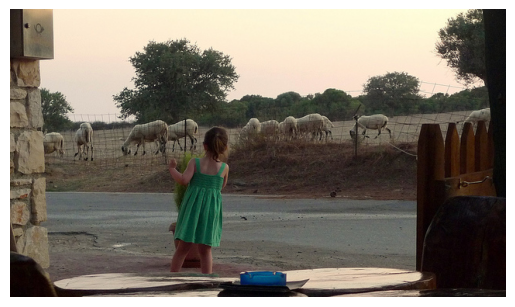

In [29]:
img_path = os.path.join(train_images_dir, img_data['file_name'])
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [31]:
caption_lengths = [len(cap['caption'].split()) for cap in coco.loadAnns(coco.getAnnIds())]
mean_caption_length = sum(caption_lengths) / len(caption_lengths)

print(f"Longueur moyenne des légendes : {mean_caption_length} mots")


Longueur moyenne des légendes : 10.458350740015407 mots


il y a donc en moyenne 10 mot pour decrire une image

In [20]:
# Calculer le nombre de légendes par image
image_ids = coco.getImgIds()
captions_per_image = [len(coco.getAnnIds(imgIds=[img_id])) for img_id in image_ids]

# Statistiques
max_captions = max(captions_per_image)
min_captions = min(captions_per_image)
mean_captions = sum(captions_per_image) / len(captions_per_image)

print(f"Légendes par image - Max : {max_captions}, Min : {min_captions}, Moyenne : {mean_captions}")


Légendes par image - Max : 7, Min : 5, Moyenne : 5.0023917954169335


Ici, nous avons le nombre de légendes associées à chaque image.

## Exploration de la répartition des résolution par image

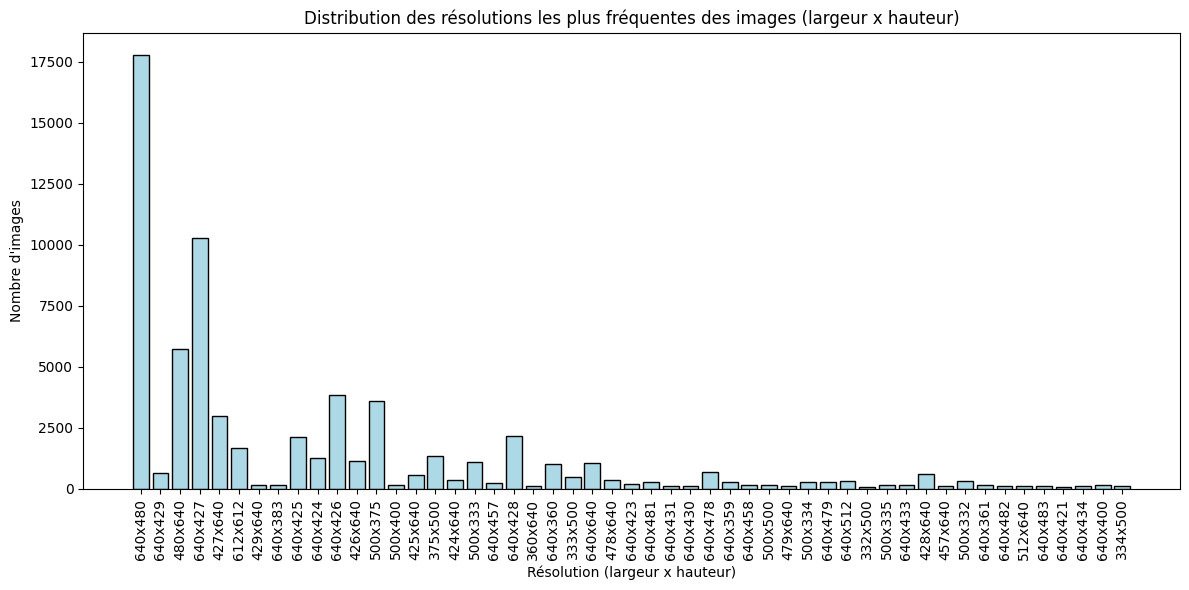

In [37]:
# Charger toutes les images avec l'objet COCO
img_ids = coco.getImgIds()
img_data = coco.loadImgs(img_ids)

# Extraire les largeurs et hauteurs
heights = [img['height'] for img in img_data]
widths = [img['width'] for img in img_data]

dimensions = [(widths[i], heights[i]) for i in range(len(widths))]

# Compter le nombre d'images pour chaque résolution (largeur x hauteur)
dimension_counts = Counter(dimensions)

common_dimensions = {dim: count for dim, count in dimension_counts.items() if count >= 100}

resolutions, counts = zip(*common_dimensions.items())

resolution_labels = [f"{width}x{height}" for width, height in resolutions]


plt.figure(figsize=(12, 6))
plt.bar(resolution_labels, counts, color='lightblue', edgecolor='black')

plt.title('Distribution des résolutions les plus fréquentes des images (largeur x hauteur)')
plt.xlabel('Résolution (largeur x hauteur)')
plt.ylabel('Nombre d\'images')

plt.xticks(rotation=90)

plt.tight_layout()


plt.show()


La majorité des images du dataset MS COCO ont des résolutions relativement homogènes, avec une forte concentration autour de résolutions comme 640x480 et 480x640. Cela signifie que nous pouvons envisager de redimensionner toutes les images à une résolution commune (comme 640x480), sans perdre trop de détails dans la majorité des images. 

## Exploration de la répartition des annotation par catégorie

loading annotations into memory...
Done (t=6.80s)
creating index...
index created!


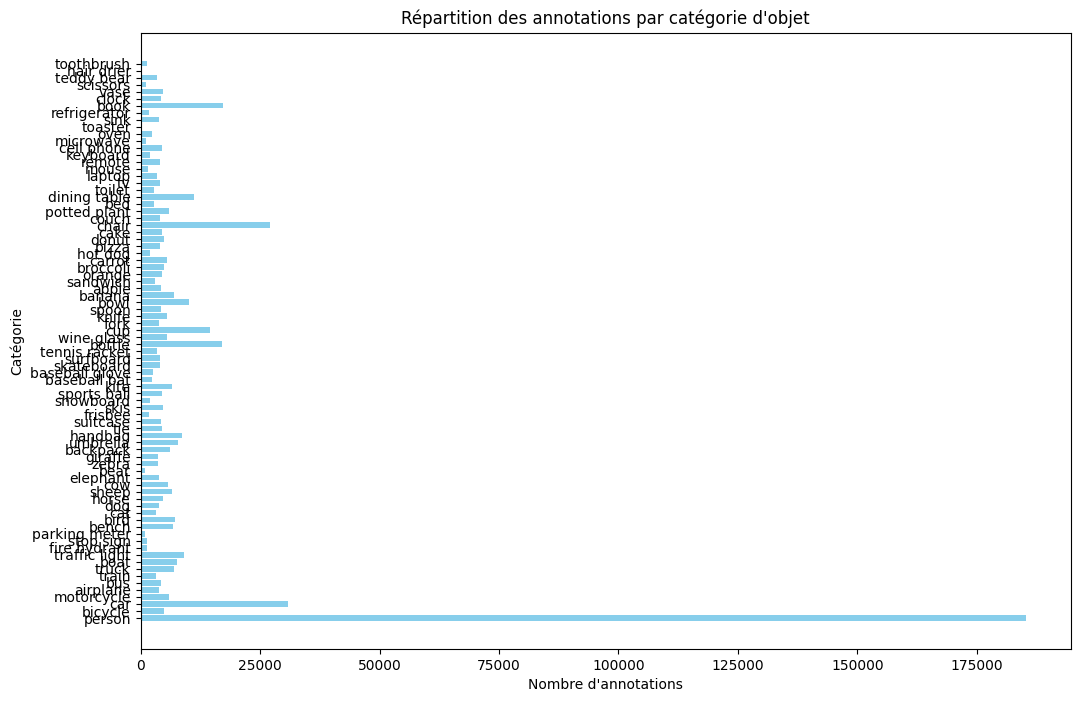

In [41]:
# Charger les annotations des objets 
coco = COCO(annFile)

# Charger les catégories d'objets
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]

# Compter le nombre d'annotations par catégorie
category_counts = [len(coco.getAnnIds(catIds=[cat['id']])) for cat in categories]

plt.figure(figsize=(12, 8))
plt.barh(category_names, category_counts, color='skyblue')
plt.title('Répartition des annotations par catégorie d\'objet')
plt.xlabel('Nombre d\'annotations')
plt.ylabel('Catégorie')
plt.show()


On observe qu'il y a un très grand nombre d'annotations pour la catégorie 'person', ce qui indique un déséquilibre entre les classes. Ce déséquilibre peut nuire à l'entraînement du modèle, car il risque de favoriser les catégories sur-représentées, comme 'person', au détriment des autres catégories moins fréquentes.

## Exploration de la répartition des annotations par image

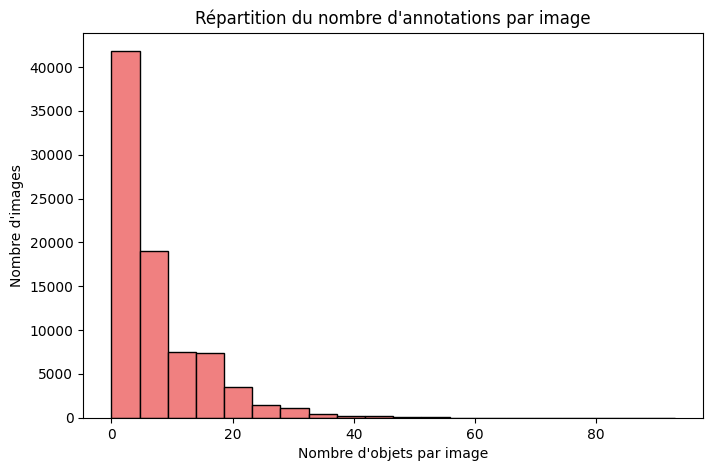

Nombre moyen d'objets par image : 7.31
Nombre maximal d'objets dans une image : 93


In [42]:
# Calculer le nombre d'annotations par image
image_ids = coco.getImgIds()
annotations_per_image = [len(coco.getAnnIds(imgIds=[img_id])) for img_id in image_ids]

# Visualiser la répartition
plt.figure(figsize=(8, 5))
plt.hist(annotations_per_image, bins=20, color='lightcoral', edgecolor='black')
plt.title('Répartition du nombre d\'annotations par image')
plt.xlabel('Nombre d\'objets par image')
plt.ylabel('Nombre d\'images')
plt.show()

# Afficher quelques statistiques
print(f"Nombre moyen d'objets par image : {sum(annotations_per_image) / len(annotations_per_image):.2f}")
print(f"Nombre maximal d'objets dans une image : {max(annotations_per_image)}")


- En moyenne, chaque image contient environ 7.31 objets. Cela signifie que les images dans ce dataset sont relativement complexes, avec plusieurs objets à détecter dans chaque image.

- Une grande proportion des images contient moins de 10 objets. Cela peut être plus facile à traiter pour des modèles de détection d'objets, mais cela signifie également qu'il existe une minorité d'images qui sont beaucoup plus complexes.

- Le nombre maximal d'objets annotés dans une image est 93, ce qui montre que certaines images du dataset sont extrêmement complexes. Ces images sont rares mais peuvent être des cas difficiles pour un modèle de détection d'objets.

# Préparation-des-légendes

Avant d'utiliser les méthodes de transfert learning pour extraire les caractéristiques des images, nous devons préparer les légendes associées. Cela inclut la tokenisation des légendes et leur transformation en séquences numériques, qui seront utilisées pour entraîner le modèle LSTM.

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

coco_caps = COCO(train_annotations_file)
captions = []
img_ids = coco_caps.getImgIds()


for img_id in img_ids:
    ann_ids = coco_caps.getAnnIds(imgIds=img_id)
    anns = coco_caps.loadAnns(ann_ids)
    for ann in anns:
        captions.append(ann['caption'])


tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")  # Limité à 5000 mots
tokenizer.fit_on_texts(captions)

# Convertir les légendes en séquences de tokens
sequences = tokenizer.texts_to_sequences(captions)

padded_sequences = pad_sequences(sequences, padding='post')

print(f"Exemple de légende tokenisée : {padded_sequences[0]}")


loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
Exemple de légende tokenisée : [  2 341  52 587  97 504   8 283   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


# Architecture de Captioning

Il existe plusieurs architectures pour générer des légendes à partir d'images. Nous nous concentrerons sur deux approches principales :

- Injecting Architecture
- Merging Architecture

## Injecting Architecture

Dans cette architecture, le modèle CNN (pré-entraîné) extrait des caractéristiques visuelles des images, qui sont ensuite injectées dans un RNN (par exemple, LSTM) pour générer les légendes

![image.png](https://cdn.discordapp.com/attachments/822939064537317376/1297305671368441856/image.png?ex=6715718e&is=6714200e&hm=720cb051d1ba4673c580e363b39878dd97f42f44f0165068b97a30506038cfba&)

### Choix du modèle CNN pour extraction de caractéristiques :

| **Modèle**         | **Taille des Entrées** | **Nombre de Paramètres** | **Profondeur** | **Taille du Modèle** | **Performance (ImageNet)** | **Avantages**                          | **Inconvénients**                        |
|--------------------|------------------------|--------------------------|----------------|----------------------|----------------------------|----------------------------------------|------------------------------------------|
| **InceptionV3**    | 299x299                | ~23.8 millions            | 48 couches     | ~92 MB               | Top-1: 77.9%                | - Bonne efficacité pour des tâches complexes<br>- Relativement léger | - Taille d'entrée spécifique (299x299)<br>- Plus complexe que ResNet pour certains cas |
| **ResNet50**       | 224x224                | ~25.6 millions            | 50 couches     | ~98 MB               | Top-1: 76.2%                | - Très populaire pour le transfert learning<br>- Facile à utiliser<br>- Bon équilibre entre profondeur et performance | - Peut être trop profond pour des tâches simples |
| **VGG16**          | 224x224                | ~138 millions             | 16 couches     | ~528 MB              | Top-1: 71.5%                | - Facile à comprendre et à implémenter<br>- Très utilisé dans les benchmarks | - Très grand nombre de paramètres (lent et gourmand en mémoire) |
| **EfficientNet-B0**| 224x224                | ~5.3 millions             | 82 couches     | ~29 MB               | Top-1: 77.1%                | - Très efficace en termes de taille de modèle et de calcul<br>- Bon compromis entre performance et légèreté | - Moins utilisé que ResNet ou Inception (moins de ressources disponibles) |
| **MobileNetV2**    | 224x224                | ~3.5 millions             | 53 couches     | ~14 MB               | Top-1: 71.8%                | - Modèle très léger<br>- Idéal pour des applications mobiles ou embarquées | - Performances inférieures aux autres modèles pour les tâches complexes |
| **Xception**       | 299x299                | ~22.9 millions            | 71 couches     | ~88 MB               | Top-1: 79.0%                | - Basé sur Inception, mais plus efficace pour certaines tâches<br>- Très performant | - Moins utilisé et documenté que ResNet ou Inception |
| **DenseNet121**    | 224x224                | ~8 millions               | 121 couches    | ~33 MB               | Top-1: 74.9%                | - Réseau très compact<br>- Moins de paramètres pour de bonnes performances | - Complexité due à la densité des connexions (plus lent à entraîner) |



Le transfert learning est une technique qui consiste à réutiliser un modèle pré-entraîné sur un large dataset (comme ImageNet) pour une nouvelle tâche spécifique. Cela permet d’accélérer le processus d’apprentissage et d’améliorer les performances, surtout lorsque l’on dispose de moins de données pour entraîner un modèle de zéro. Voici les principales approches du transfert learning :

### Transfert learning

Le transfert learning est une technique qui consiste à réutiliser un modèle pré-entraîné sur un large dataset (comme ImageNet) pour une nouvelle tâche spécifique. Cela permet d’accélérer le processus d’apprentissage et d’améliorer les performances, surtout lorsque l’on dispose de moins de données pour entraîner un modèle de zéro. Voici les principales approches du transfert learning :

| **Technique**                 | **Description**                                                                                   | **Quand l'utiliser ?**                                                                 | **Avantages**                                                     | **Inconvénients**                                                       |
|-------------------------------|---------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|-------------------------------------------------------------------|--------------------------------------------------------------------------|
| **Feature Extraction**         | Utiliser un modèle pré-entraîné pour extraire des **caractéristiques fixes** sans ré-entraîner le modèle. | Lorsque tu veux utiliser un modèle pré-entraîné sans le ré-entraîner sur ton dataset.   | - Rapide<br>- Nécessite peu de données.                                 | - Caractéristiques pas toujours parfaitement adaptées à ton dataset si celui-ci est très différent du dataset d'origine.    |
| **Fine Tuning (Affinage)**     | **Dégeler** certaines couches du modèle pré-entraîné et les ré-entraîner sur ton dataset spécifique. | Lorsque tu veux adapter partiellement un modèle pré-entraîné à ton dataset.             | - Adaptation plus fine au dataset<br>- Améliore souvent les performances. | - Nécessite plus de temps d'entraînement<br>- Risque de surajustement si peu de données.         |
| **Full Fine-Tuning**           | **Dégeler toutes les couches** du modèle pré-entraîné et les ré-entraîner entièrement sur ton dataset. | Lorsque ton dataset est très différent du dataset d'origine du modèle pré-entraîné.     | - Flexibilité maximale pour adapter au dataset spécifique.           | - Très long à entraîner<br>- Nécessite beaucoup de données pour éviter le surapprentissage.                    |


#### Feature Extraction (Extraction des caractéristiques)

![image.png](https://www.researchgate.net/publication/363695026/figure/fig3/AS:11431281085332127@1663720421792/Feature-Extraction-in-Transfer-Learning.png)

Commencons par utiliser **InceptionV3**, nous allons extraire les caractéristiques (features) du modèle 

In [48]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
from pycocotools.coco import COCO
import os

# Architecture Injecting avec Feature Extraction
def feature_extraction():
    cnn_model = InceptionV3(weights='imagenet', include_top=False)
    
    for layer in cnn_model.layers:
        layer.trainable = False

    image_input = cnn_model.input
    image_output = cnn_model.layers[-1].output
    feature_extractor = Model(inputs=image_input, outputs=image_output)

    coco = COCO(annFile)
    train_images_dir = os.path.join(dataset_dir, 'train2014/')


    def extract_features(img_path, model):
        img = image.load_img(img_path, target_size=(299, 299))  
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  
        features = model.predict(img_array)
        return features


    img_ids = coco.getImgIds()
    img_id = img_ids[0]  
    img_data = coco.loadImgs(img_id)[0]
    img_path = os.path.join(train_images_dir, img_data['file_name'])

    features = extract_features(img_path, feature_extractor)
    print(f"Dimensions des caractéristiques extraites : {features.shape}")

    return features



feature_extraction_Injecting_Architecture = feature_extraction()




loading annotations into memory...
Done (t=6.46s)
creating index...
index created!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step
Dimensions des caractéristiques extraites : (1, 8, 8, 2048)


Après avoir chargé les annotations et les images du dataset MS COCO, nous avons extrait les **caractéristiques visuelles** d'une image en utilisant le modèle pré-entraîné **InceptionV3**.

- Le message **"Loading annotations into memory..."** indique que les annotations du dataset ont été chargées et indexées, ce qui permet de manipuler les légendes et les images du dataset plus facilement.
  
- Ensuite, nous avons extrait les caractéristiques d'une image avec InceptionV3. Les **dimensions des caractéristiques extraites** sont **(1, 8, 8, 2048)** :
  - **1** : Correspond à la taille du lot (ici, 1 image est traitée).
  - **8x8** : Taille de la carte de caractéristiques générée par les couches convolutionnelles du modèle. Elle représente un résumé spatial de l'image.
  - **2048** : Nombre de filtres ou de canaux. Chaque canal capture une caractéristique visuelle particulière (textures, formes, etc.).

Ces caractéristiques seront ensuite utilisées comme entrée dans le modèle **LSTM** pour générer des légendes basées sur ces informations visuelles.


### fine tuning affinage

![image.png](https://www.researchgate.net/profile/Esra-Alhadhrami/publication/326048343/figure/fig1/AS:643818495950849@1530509699224/Transfer-learning-approaches-a-Fine-tuning-b-CNN-as-feature-extractor.png)

In [51]:
# Architecture Injecting avec Fine Tuning
def fine_tuning():
    # Charger InceptionV3 avec les poids ImageNet
    cnn_model = InceptionV3(weights='imagenet', include_top=False)

    # Geler toutes les couches sauf les 20 dernières (par exemple)
    for layer in cnn_model.layers[:-20]:
        layer.trainable = False
    
    # Dégeler les 20 dernières couches pour le fine-tuning
    for layer in cnn_model.layers[-20:]:
        layer.trainable = True

    # Créer le modèle d'extraction de caractéristiques
    image_input = cnn_model.input
    image_output = cnn_model.layers[-1].output
    feature_extractor = Model(inputs=image_input, outputs=image_output)

    # Charger le dataset COCO
    coco = COCO(annFile)
    train_images_dir = os.path.join(dataset_dir, 'train2014/')

    # Fonction pour extraire les caractéristiques avec Fine-Tuning
    def extract_features(img_path, model):
        img = image.load_img(img_path, target_size=(299, 299))  
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  
        features = model.predict(img_array)
        return features

    # Extraire les caractéristiques pour une image
    img_ids = coco.getImgIds()
    img_id = img_ids[0]  
    img_data = coco.loadImgs(img_id)[0]
    img_path = os.path.join(train_images_dir, img_data['file_name'])

    # Extraire les caractéristiques de l'image avec Fine-Tuning
    features = extract_features(img_path, feature_extractor)
    print(f"Dimensions des caractéristiques extraites avec Fine-Tuning : {features.shape}")

    return features

# Appel de la fonction Fine Tuning
fine_tuning_Injecting_Architecture = fine_tuning()


loading annotations into memory...
Done (t=6.46s)
creating index...
index created!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Dimensions des caractéristiques extraites avec Fine-Tuning : (1, 8, 8, 2048)


### Full Fine Tuning